The objective of this notebook is to demonstrate that Negative Log-Likelihood (NLL) and Cross-Entropy are essentially the same when it comes to training a classification model. We will compare the loss values at each epoch for both NLL and Cross-Entropy to show that they decrease in a similar fashion.

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

## Step 1: Prepare Toy Data
We create a toy dataset with 4 samples and 3 classes. X contains the feature vectors, and y contains the corresponding labels.

In [11]:
X = torch.tensor([[1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 1, 0]], dtype=torch.float32)
y = torch.tensor([0, 1, 2, 1], dtype=torch.long)


## Step 2: Define the Model
We define a simple neural network model with one fully connected layer. The forward method applies a log softmax function, which is necessary for NLL loss.

In [12]:
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(3, 3)
        
    def forward(self, x):
        return nn.functional.log_softmax(self.fc(x), dim=1)


## Step 3: Initialize Model, Loss, and Optimizer
We initialize two instances of the model, one for NLL and one for Cross-Entropy. We also define the loss functions and optimizers for both.

In [13]:
# Initialize model
model_nll = SimpleModel()
model_ce = SimpleModel()

# Initialize lists to store loss values
nll_losses = []
ce_losses = []

# Using NLL Loss
criterion_nll = nn.NLLLoss()
optimizer_nll = optim.SGD(model_nll.parameters(), lr=0.01)

# Using Cross-Entropy Loss
criterion_ce = nn.CrossEntropyLoss()
optimizer_ce = optim.SGD(model_ce.parameters(), lr=0.01)

## Step 4: Training Loop
We train both models for 100 epochs, updating the weights using SGD. We print the loss values at every 10th epoch to compare NLL and Cross-Entropy directly.

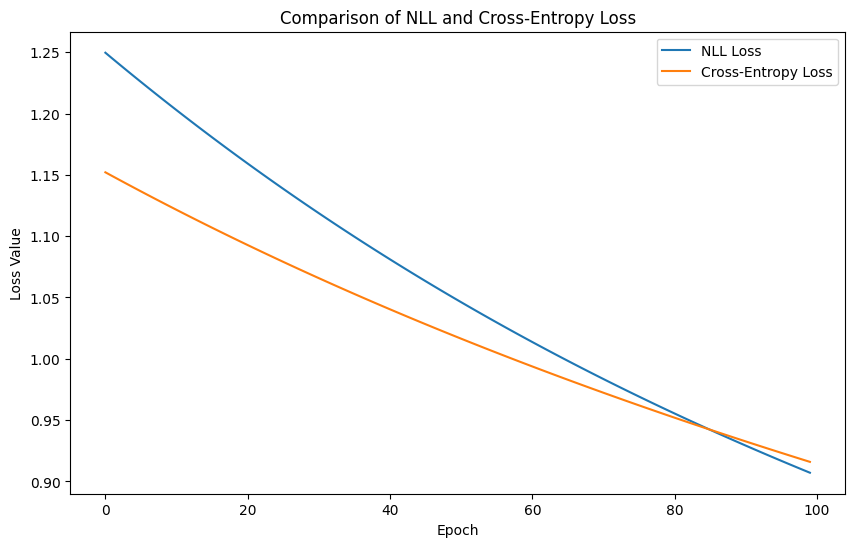

In [14]:
# Training loop for NLL
for epoch in range(100):
    output = model_nll(X)
    loss_nll = criterion_nll(output, y)
    optimizer_nll.zero_grad()
    loss_nll.backward()
    optimizer_nll.step()
    nll_losses.append(loss_nll.item())

# Training loop for Cross-Entropy
for epoch in range(100):
    output = model_ce(X)
    loss_ce = criterion_ce(output, y)
    optimizer_ce.zero_grad()
    loss_ce.backward()
    optimizer_ce.step()
    ce_losses.append(loss_ce.item())

# Plot the loss values
plt.figure(figsize=(10, 6))
plt.plot(nll_losses, label='NLL Loss')
plt.plot(ce_losses, label='Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.title('Comparison of NLL and Cross-Entropy Loss')
plt.show()
